In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Load the dataset
df = pd.read_csv("loan_data.csv")


In [172]:
# Check for missing values
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


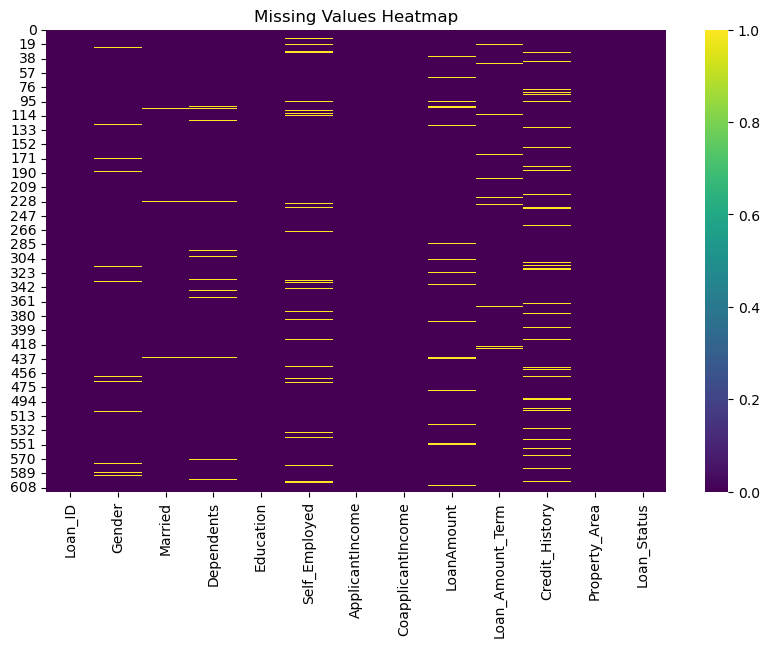

In [173]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=True)
plt.title("Missing Values Heatmap")
plt.show()

In [6]:
# Handle missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['LoanAmount']] = imputer.fit_transform(df[['LoanAmount']])
df.dropna(inplace=True)

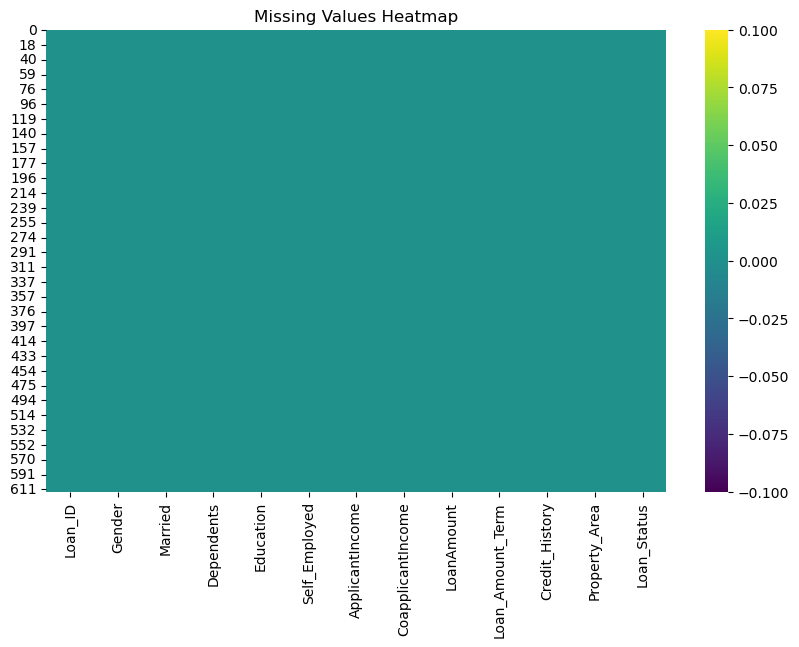

In [176]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=True)
plt.title("Missing Values Heatmap")
plt.show()

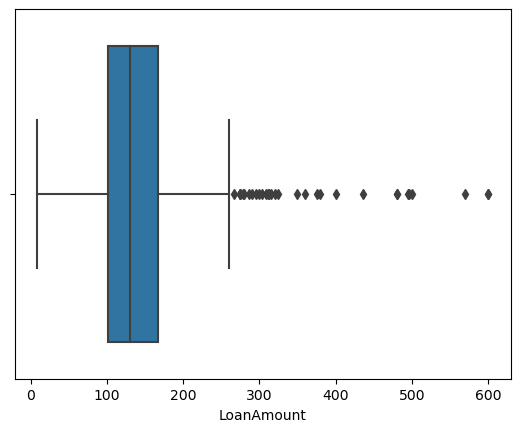

In [177]:
# Check for outliers
sns.boxplot(x=df['LoanAmount'])
plt.show()

In [7]:
# Handle outliers
df = df[df['LoanAmount'] < 400]

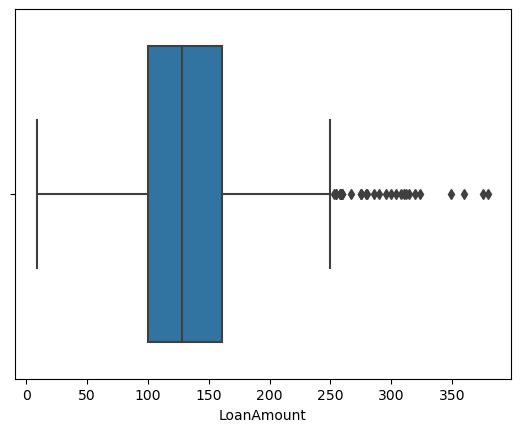

In [179]:
sns.boxplot(x=df['LoanAmount'])
plt.show()

In [180]:
# Check for non-numeric features
print(df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [8]:
# Handle non-numeric features
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

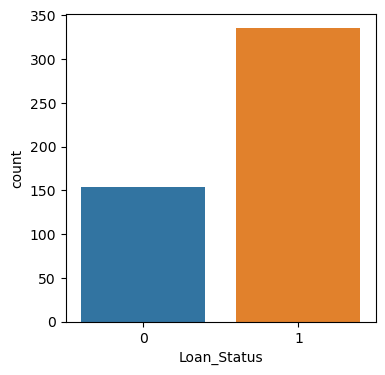

In [182]:
# Check for imbalanced data
plt.figure(figsize=(4, 4))
sns.countplot(df['Loan_Status'])
plt.show()


In [9]:
# Handle imbalanced data using SMOTEENN
smote_enn = SMOTEENN(random_state=0)
df.drop(['Loan_ID'], axis=1, inplace=True)
X_resampled, y_resampled = smote_enn.fit_resample(df.drop(['Loan_Status'], axis=1), df['Loan_Status'])
df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

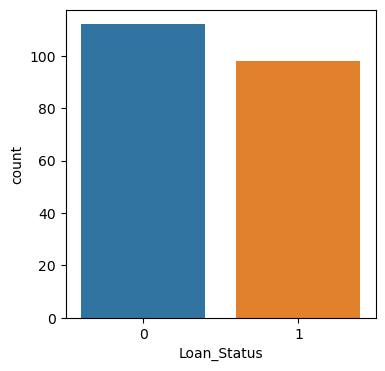

In [184]:
plt.figure(figsize=(4, 4))
sns.countplot(df['Loan_Status'])
plt.show()

In [10]:
# Scale the data
sc = StandardScaler()
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = sc.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

In [186]:
df.head

<bound method NDFrame.head of      Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0        -1.075455   
1         0        0           0          0              0        -0.164976   
2         0        0           0          0              0         0.230646   
3         1        1           2          0              0         0.442743   
4         1        1           0          0              0        -0.244100   
..      ...      ...         ...        ...            ...              ...   
205       1        0           0          1              1         1.093321   
206       1        0           0          1              0         0.012504   
207       1        1           2          0              0         1.082332   
208       1        1           3          0              0         1.040022   
209       0        0           0          0              0        -0.500155   

     CoapplicantIncom

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Loan_Status'], axis=1), df['Loan_Status'], test_size=0.2, random_state=42)


In [188]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(168, 11)
(168,)
(42, 11)
(42,)


In [12]:
# Define the classifiers
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

In [13]:
# Define the hyperparameters
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)}
knn_params = {'n_neighbors': [3, 5, 7, 9]}
dt_params = {'max_depth': [3, 5, 7, 9]}

In [14]:
# Perform GridSearchCV to find the best hyperparameters
nb_grid = GridSearchCV(nb, nb_params, cv=5)
nb_grid.fit(X_train, y_train)

knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, y_train)

dt_grid = GridSearchCV(dt, dt_params, cv=5)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9]})

In [15]:
# Print the best hyperparameters for each classifier
print("Naive Bayes best parameters: ", nb_grid.best_params_)
print("KNN best parameters: ", knn_grid.best_params_)
print("Decision Tree best parameters: ", dt_grid.best_params_)

Naive Bayes best parameters:  {'var_smoothing': 1.873817422860383e-06}
KNN best parameters:  {'n_neighbors': 3}
Decision Tree best parameters:  {'max_depth': 9}


Naive Bayes accuracy:  0.8333333333333334
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.85      0.81      0.83        21

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.83      0.83      0.83        42



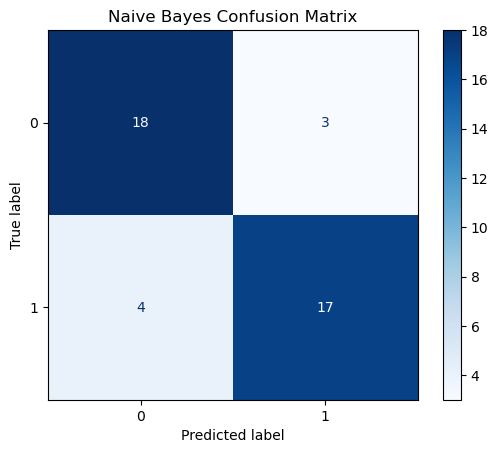

In [16]:
#Train the Naive Bayes classifier
nb= GaussianNB(var_smoothing=nb_grid.best_params_['var_smoothing'])
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes accuracy: ", nb_acc)
print(classification_report(y_test, nb_pred))

# Plot the confusion matrix for the Naive Bayes classifier
plot_confusion_matrix(nb, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

KNN accuracy:  0.8571428571428571
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.94      0.76      0.84        21

    accuracy                           0.86        42
   macro avg       0.87      0.86      0.86        42
weighted avg       0.87      0.86      0.86        42



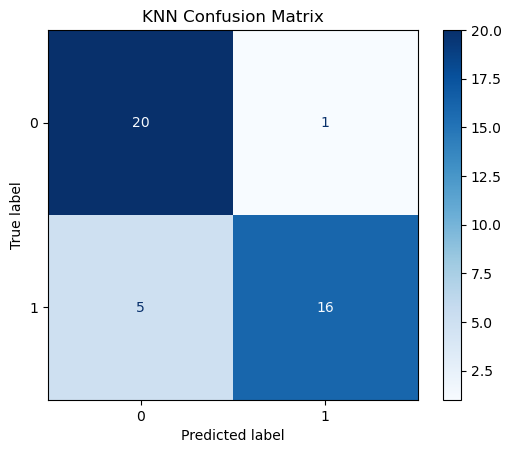

In [17]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=knn_grid.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN accuracy: ", knn_acc)
print(classification_report(y_test, knn_pred))

# Plot the confusion matrix for the KNN classifier
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix")
plt.show()

Decision Tree accuracy:  0.7619047619047619
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        21
           1       0.82      0.67      0.74        21

    accuracy                           0.76        42
   macro avg       0.77      0.76      0.76        42
weighted avg       0.77      0.76      0.76        42



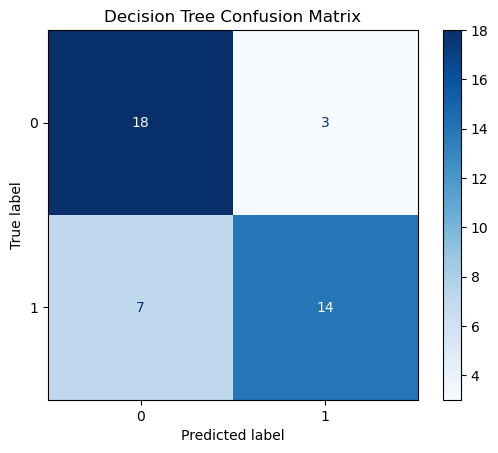

In [18]:

# Train the Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=dt_grid.best_params_['max_depth'])
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree accuracy: ", dt_acc)
print(classification_report(y_test, dt_pred))

# Plot the confusion matrix for the Decision Tree classifier
plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()

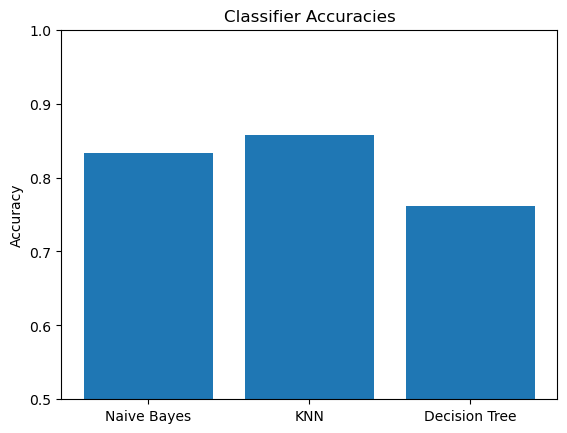

In [19]:
# Store the accuracies in a list
accs = [nb_acc, knn_acc, dt_acc]

# Create a bar plot to compare the accuracies
plt.bar(['Naive Bayes', 'KNN', 'Decision Tree'], accs)
plt.ylim(0.5, 1.0)
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies')
plt.show()

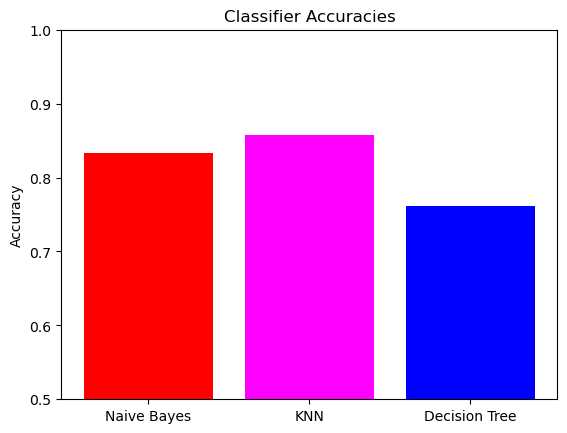

In [20]:
# Define a list of colors for each bar
colors = ['red', 'magenta', 'blue']

# Create a bar plot to compare the accuracies
plt.bar(['Naive Bayes', 'KNN', 'Decision Tree'], accs, color=colors)
plt.ylim(0.5, 1.0)
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies')
plt.show()